In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

In [3]:
len(X_train),len(X_test)

(60000, 10000)

In [4]:
X_train=X_train/255
X_test=X_test/255

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
#X_train[0]

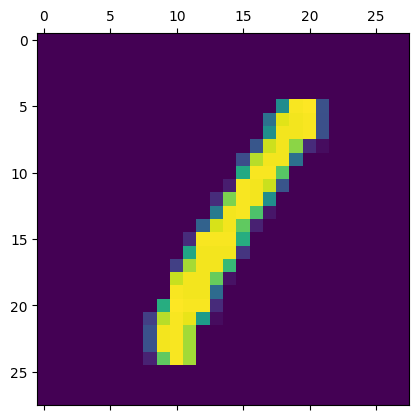

In [7]:
plt.matshow(X_train[3])

In [8]:
Y_train[3]

np.uint8(1)

In [9]:
x_train_flatten=X_train.reshape(len(X_train),28*28)
x_test_flatten=X_test.reshape(len(X_test),28*28)

In [10]:
model=keras.Sequential(
    [keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")]
)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)
model.fit(x_train_flatten,Y_train,epochs=5)

C:\Users\satya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8144 - loss: 0.7124
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9156 - loss: 0.3063
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9196 - loss: 0.2853
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9229 - loss: 0.2767
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9243 - loss: 0.2639


In [11]:
model.evaluate(x_test_flatten,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9142 - loss: 0.3049


[0.26815786957740784, 0.9257000088691711]

In [12]:
y_test_predict=model.predict(x_test_flatten)
y_predicted=[np.argmax(i) for i in y_test_predict]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step   


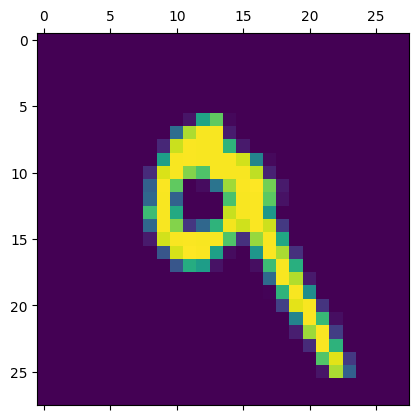

In [13]:
plt.matshow(X_test[7])

In [14]:
y_test_predict[7]

array([3.6403503e-06, 3.4844613e-01, 2.1487612e-02, 3.5917226e-02,
       4.1176495e-01, 3.8395309e-01, 1.2980100e-03, 2.2515619e-02,
       1.5092385e-01, 9.8381281e-01], dtype=float32)

In [15]:
y_predicted[7]

np.int64(9)

Text(95.72222222222221, 0.5, 'truth')

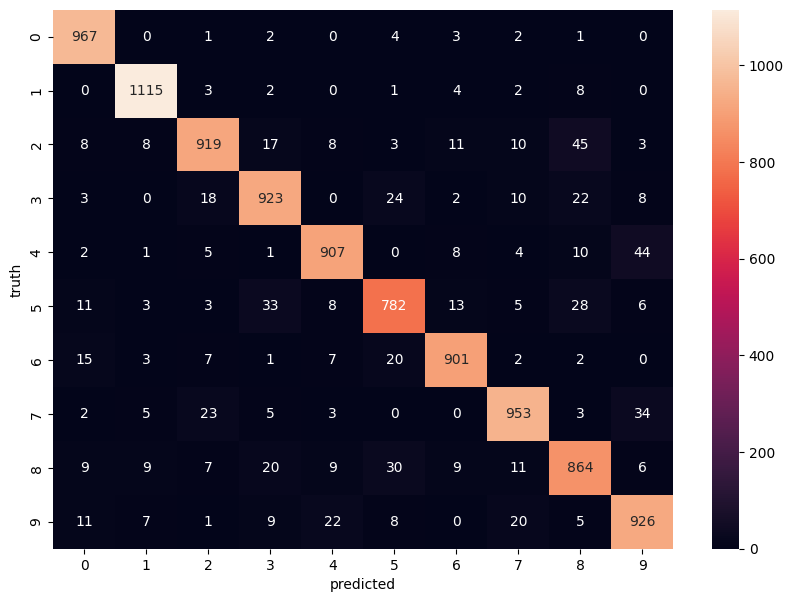

In [16]:
cm=tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("predicted")
plt.ylabel("truth")

In [17]:
#making model more flexible by adding hidden layer
model=keras.Sequential(
    [keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")]
)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)
model.fit(X_train,Y_train,epochs=5)

C:\Users\satya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8760 - loss: 0.4463
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9642 - loss: 0.1236
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9743 - loss: 0.0865
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9816 - loss: 0.0631
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9855 - loss: 0.0475
